In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['figure.figsize'] = 8,8

from scipy.ndimage.interpolation import zoom
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

import numpy as np
import os

In [ ]:
import gradcamutils

In [3]:
model = VGG16(include_top=True, weights='imagenet',input_shape=(224,224,3))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________

image/cat_dog.png
class activation map for: ('n02108089', 'boxer', 0.42014137)


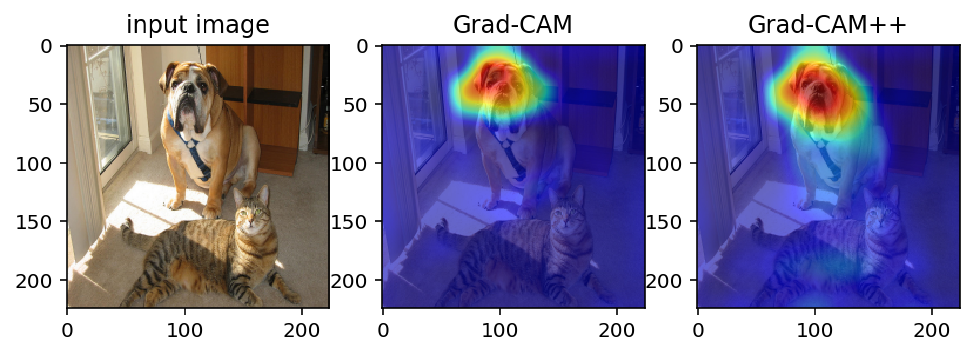

image/multiple_dogs.jpg
class activation map for: ('n02090622', 'borzoi', 0.2018977)


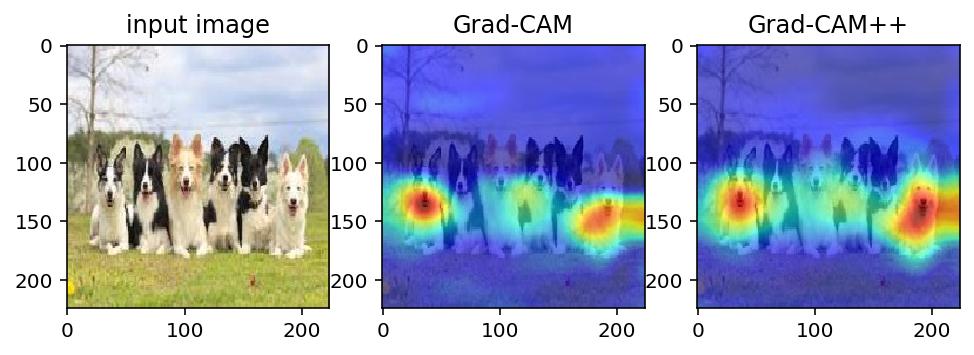

image/collies.JPG
class activation map for: ('n02106166', 'Border_collie', 0.67478704)


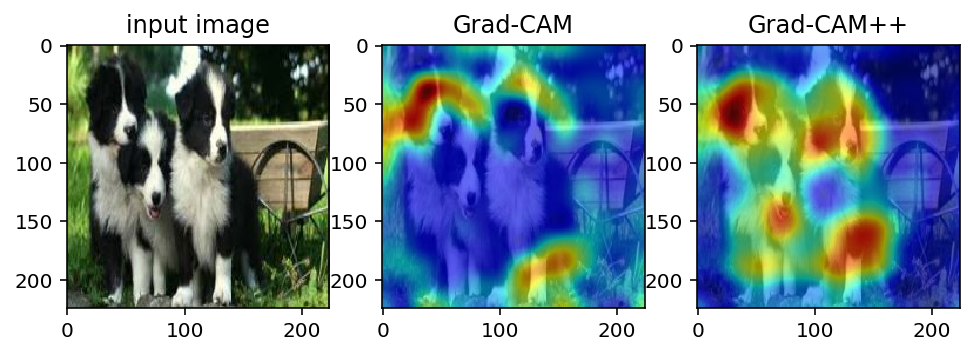

image/snake.JPEG
class activation map for: ('n01751748', 'sea_snake', 0.5346081)


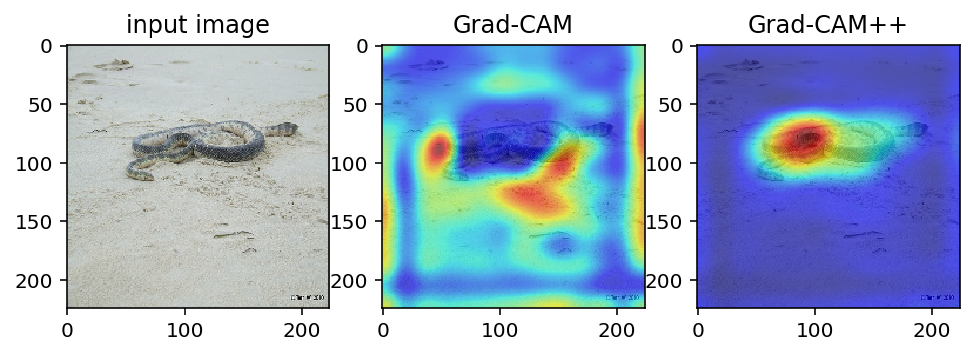

image/water-bird.JPEG
class activation map for: ('n02006656', 'spoonbill', 0.9999374)


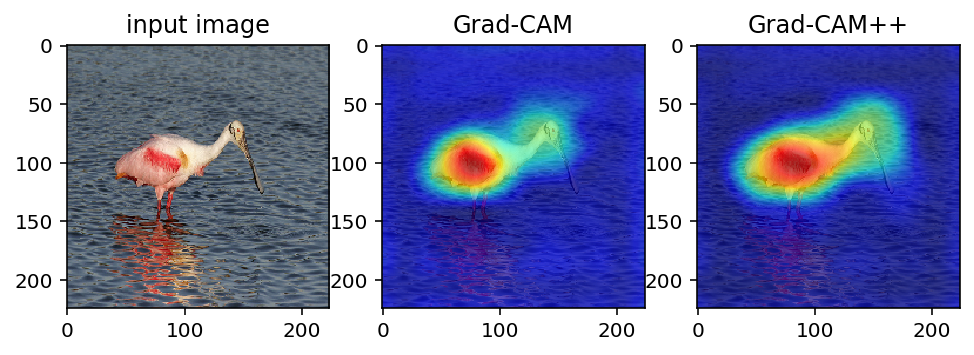

In [5]:
paths = ["cat_dog.png","multiple_dogs.jpg","collies.JPG","snake.JPEG","water-bird.JPEG"]
for path in paths:
    path = os.path.join("image",path)
    orig_img = np.array(load_img(path,target_size=(224,224)),dtype=np.uint8)
    img = np.array(load_img(path,target_size=(224,224)),dtype=np.float64)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    img
#     predictions = model.predict(img)
#     top_n = 5
#     top = decode_predictions(predictions, top=top_n)[0]
#     cls = np.argsort(predictions[0])[-top_n:][::-1]
    
#     gradcam=gradcamutils.grad_cam(model,img,layer_name='block5_conv3')
#     gradcamplus=gradcamutils.grad_cam_plus(model,img,layer_name='block5_conv3')
#     print(path)
#     print("class activation map for:",top[0])
#     fig, ax = plt.subplots(nrows=1,ncols=3)
#     plt.subplot(131)
#     plt.imshow(orig_img)
#     plt.title("input image")
#     plt.subplot(132)
#     plt.imshow(orig_img)
#     plt.imshow(gradcam,alpha=0.6,cmap="jet")
#     plt.title("Grad-CAM")
#     plt.subplot(133)
#     plt.imshow(orig_img)
#     plt.imshow(gradcamplus,alpha=0.6,cmap="jet")
#     plt.title("Grad-CAM++")
#     plt.show()